In [1]:
#!pip install google-cloud-bigquery pandas db-dtypes google-cloud-bigquery-storage
import os
from google.cloud import bigquery
import pandas as pd

import db_dtypes



print("db-dtypes is installed correctly.")


# Set the credentials for Google BigQuery
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "st312-442610-b9934d6c7287.json"
client = bigquery.Client()


db-dtypes is installed correctly.


In [2]:
from classes import *

### Step 1 - get the transaction hashes for everything we want in the period


In [15]:

query = """
SELECT `hash`
  FROM `bigquery-public-data.crypto_polygon.transactions`
  WHERE to_address = "0x78769d50be1763ed1ca0d5e878d93f05aabff29e"
  AND block_timestamp BETWEEN "2024-07-01 00:00:00" AND "2024-07-01 23:59:59"
"""

transaction_hashes = client.query(query).to_dataframe()

transaction_hashes.head()

,hash
0,0x1e6ec8459c39d80db5b9b9afdf80db80911881c224c4...
1,0xafe8f35dc36c33ca8c9781ae8ce6ed334e65f221ee63...
2,0xf30986d4291ffa318eb99aac8cc1f89fc72356fa209e...
3,0x2e240b796ee23615fc324d3be83f985fd0b11b0d2902...
4,0x3e1782069da087ea8eb08e5b944b6f6f333df9f0b1bc...


# Step 2 - get all the logs for each transactions


#### Assumption 1 
* only use orders matched and that all orders matached are 0x63bf4d16b7fa898ef4c4b2b6d90fd201e9c56313b65638af6088d149d2ce956c

Cred Evelyne Ong the Second

In [ ]:
batch_size = 100
matched_df = pd.DataFrame()
filled_df = pd.DataFrame()

#for i in range(0, len(transaction_hashes), batch_size):
for i in range(0, 100, batch_size):
    # Get the current batch of 100 transaction hashes
    batch_hashes = transaction_hashes['hash'][i:i + batch_size].tolist()

    # Create the IN clause with the batch of hashes
    hashes_in_clause = "', '".join(batch_hashes)



    
    # Prepare the query with the IN clause
    query = f"""
    SELECT transaction_hash, address, `data`, topics, block_timestamp
    FROM `bigquery-public-data.crypto_polygon.logs`
    WHERE transaction_hash IN ('{hashes_in_clause}')
    AND block_timestamp BETWEEN "2024-07-01 00:00:00" AND "2024-07-01 23:59:59"

    """


    
    # Execute the query
    cur_logs = client.query(query).to_dataframe()


    
    # Filter the logs as needed
    orders_matched = cur_logs[cur_logs['topics'].apply(lambda x: x[0] == "0x63bf4d16b7fa898ef4c4b2b6d90fd201e9c56313b65638af6088d149d2ce956c")]
    orders_filled = cur_logs[cur_logs['topics'].apply(lambda x: x[0] == "0xd0a08e8c493f9c94f29311604c9de1b4e8c8d4c06bd0c789af57f2d65bfec0f6")]


    # Concatenate the results
    matched_df = pd.concat([matched_df, orders_matched], ignore_index=True)
    filled_df = pd.concat([filled_df, orders_filled], ignore_index=True)




0x1e6ec8459c39d80db5b9b9afdf80db80911881c224c4e0ca87e1bffba104d2fd', '0xafe8f35dc36c33ca8c9781ae8ce6ed334e65f221ee63f56e573ee6741bc2603f', '0xf30986d4291ffa318eb99aac8cc1f89fc72356fa209e53b4d290e8edde9190a1', '0x2e240b796ee23615fc324d3be83f985fd0b11b0d290249935224a40a98136443', '0x3e1782069da087ea8eb08e5b944b6f6f333df9f0b1bc58e51230f712eba51250', '0x281331fa937e3303e3e55fcee2d94827c05ded8490146138eabfdcc8bdb1fa7b', '0x8faf04ebecf63593024ed69fe3185c740e79621658a195ca4bd8951516e189a5', '0x2a2b8dc542aafe75d2bcf7e84348ebbba0e366677ac32f31c6dd4853ba050947', '0xa2eba6e592616f8b67b2e70ae415be977fd377d23070551e6350bf57b18077b6', '0xc1ab83014f3596a8d93a9d295dcd9e7bd17ad802175c7d68ae9d2a3d6cc83d81', '0x3a544b6ba26f6f5adc24f6284314d5c59f11a0cef131f3da496da7a3cf18d113', '0x7ce75bf27598e62c2cc37ae13bce2567ed0c3f6bf48916759fc08d0b3d4b1f35', '0x9e2fe5c88fd6d7e9e34c4743d6e40f9b3658515b4f2631f8816d63859613bbed', '0x1f905e62611282fb88b9035ec7f63aaeed465307eb36a29abb4b7fd7bbc6ee53', '0xe36471eae96fb7c481

# Now we extract the data!



# Step 3-  Now we got the data! We need to process it!

In [ ]:


people = {}
stockExchange = StockPortfolio()


def handle_orders(df):

    maker = df.iloc[0]['maker']
    taker = df.iloc[0]['taker']
    maker_asset_id = df.iloc[0]['maker_asset_id']
    taker_asset_id = df.iloc[0]['taker_asset_id']
    maker_amount = df.iloc[0]['maker_amount']
    taker_amount = df.iloc[0]['taker_amount']

    timeStamp = df.iloc[0]['block_timestamp']
    


    if maker not in people:
        people[maker] = Person(maker, 0)

    if taker not in people:
        people[taker] = Person(taker, 0)






    if maker_asset_id == "000000000000000000000000000000000000000000000000000000000000000":
        ### Maker is buying!
        people[maker].buy(taker_asset_id, taker_amount, maker_amount) 
        people[taker].sell(taker_asset_id, taker_amount, maker_amount)

        stockExchange.add_price(taker_asset_id, timeStamp, makerAmmount/takerAmount)

    if taker_asset_id == "000000000000000000000000000000000000000000000000000000000000000":
        # Taker is selling!
        people[taker].buy(maker_asset_id,maker_amount, taker_amount)
        people[maker].sell(maker_asset_id, maker_amount, taker_amount) 
        stockExchange.add_price(maker_asset_id, timeStamp, taker_amount/maker_amount)

    



for index, row in matched_df.iterrows():

    taker_order_hash = row["topics"][1]

    transaction_hash = row["transaction_hash"]
    
    data = row["data"]
    maker_asset_id = data[2:66]
    taker_asste_id = data[66:130]
    maker_amount = int(data[130:194], 16)
    taker_amount = int(data[194:258], 16)


    ### Now i get into order fillin!

    cur_filled = filled_df[filled_df['transaction_hash'] == transaction_hash]

    cur_filled["takeOrderHash"] = cur_filled["topics"].apply(lambda x: x[1])


    cur_filled = cur_filled[cur_filled["takeOrderHash"] == taker_order_hash]

    if len(cur_filled) == 0:
        pass
    if len(cur_filled) == 1:
        # oh yes!
        cur_filled["maker"] = cur_filled["topics"].apply(lambda x: x[2])
        cur_filled["taker"] = cur_filled["topics"].apply(lambda x: x[3])
        cur_filled["maker_asset_id"] = cur_filled["data"].str[2:66]
        cur_filled["taker_asset_id"] = cur_filled["data"].str[67:130]
        cur_filled["maker_amount"] = cur_filled["data"].str[130:194].apply(lambda x: int(x, 16))
        cur_filled["taker_amount"] = cur_filled["data"].str[194:258].apply(lambda x: int(x, 16))

        subset_df = cur_filled[["maker", "taker", "maker_asset_id", "taker_asset_id", "maker_amount", "taker_amount", "block_timestamp"]]
        
        handle_orders(subset_df)



Running!!!!!
step 1
000000000000000000000000000000000000000000000000000000000000000
ignore biught before study
Running!!!!!
step 1
000000000000000000000000000000000000000000000000000000000000000
ignore biught before study
Running!!!!!
step 1
000000000000000000000000000000000000000000000000000000000000000
ignore biught before study
Running!!!!!
step 1
6ae5f222cb269b416a29fcb30668a50458bd16ae7330d385c249fdf75f4b56f
Running!!!!!
step 1
ada66b0220f72b49d81cb8dfeec380b656e4f5fa8a179b371e7628463b4e964
Running!!!!!
step 1
000000000000000000000000000000000000000000000000000000000000000
ignore biught before study
Running!!!!!
step 1
9551f93342c2d7fd71ea09593b6497db0a62141d4adec2bc8912ecb4e9eabd7
Running!!!!!
step 1
ba87abe361f0449142d650de9f28b2b293e1f198254c71776ed4b70c452b36f
Running!!!!!
step 1
79298c786894800d45e29a325ac3a215529336b054f3eb20335eb3e818876dd
Running!!!!!
step 1
13e1720a015b488b2926ae072f0c1b6c828b0d7b9afe87e190600c26f392b36
Running!!!!!
step 1
00000000000000000000000000000000

/var/folders/91/z7msh67x3fg__f8d8bvv1zhr0000gn/T/ipykernel_53236/3839775648.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cur_filled["takeOrderHash"] = cur_filled["topics"].apply(lambda x: x[1])
/var/folders/91/z7msh67x3fg__f8d8bvv1zhr0000gn/T/ipykernel_53236/3839775648.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cur_filled["takeOrderHash"] = cur_filled["topics"].apply(lambda x: x[1])
/var/folders/91/z7msh67x3fg__f8d8bvv1zhr0000gn/T/ipykernel_53236/3839775648.py:63: SettingWithCopyWarning: 


In [123]:
cur_filled.iloc[0]["transaction_hash"]

'0xc322a6757cd2efac7efe88d63649f65f665f074ca260dce8dfd671a79e1b2f40'

In [8]:
people

{'0x0000000000000000000000004ce73141dbfce41e65db3723e31059a730f0abad': <classes.Person at 0x146f04430>,
 '0x000000000000000000000000c5d563a36ae78145c45a50134d48a1215220f80a': <classes.Person at 0x146fc3e20>}

In [10]:
people["0x000000000000000000000000c5d563a36ae78145c45a50134d48a1215220f80a"].balance

-98870

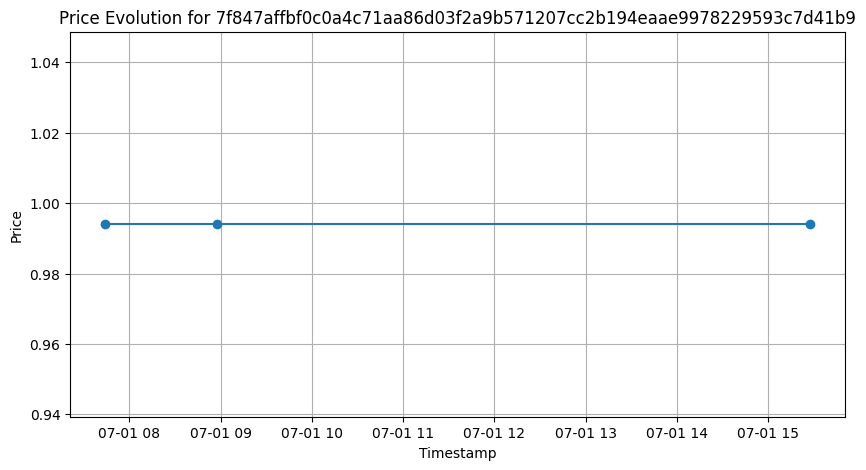

In [27]:
stockExchange.stocks["7f847affbf0c0a4c71aa86d03f2a9b571207cc2b194eaae9978229593c7d41b9"].plot_prices()

In [28]:
stockExchange.stocks["7f847affbf0c0a4c71aa86d03f2a9b571207cc2b194eaae9978229593c7d41b9"].prices

[(Timestamp('2024-07-01 07:44:12+0000', tz='UTC'), 0.994),
 (Timestamp('2024-07-01 08:57:22+0000', tz='UTC'), 0.994),
 (Timestamp('2024-07-01 15:27:32+0000', tz='UTC'), 0.994)]

### Game plan
1. Find the month we want - we doing 8th of 2024
2. Get all the contracts big people interact with on poly market

2. Get all info from those contracts

stockExchange.stocks

In [24]:
for s in stockExchange.stocks:
    print(s)
    print( stockExchange.stocks[s].prices)



8fe94a91b3c0d2e797c2e1baf407b4efd98646362f83ad7b5a679b4fd63867e8
[(Timestamp('2024-07-01 00:16:45+0000', tz='UTC'), 0.005)]
c13e5c749b7ecf18bceb8a1ddc64f81368751d44d3e35813d0bc1c8bc4460257
[(Timestamp('2024-07-01 00:16:49+0000', tz='UTC'), 0.125)]
1cb4f2541981372ef951c6b653456d242aa61994784e0c8e91a753539549a0f3
[(Timestamp('2024-07-01 00:17:39+0000', tz='UTC'), 0.131)]
85913a15aa5f6209e7887e46821f613eca5a47da8421533ae72b1b23b22198cb
[(Timestamp('2024-07-01 00:24:43+0000', tz='UTC'), 0.001)]
318d841df5328045b58cb22e98f9d1281a9e60860a2804527ad1a810b1a49f0d
[(Timestamp('2024-07-01 01:26:15+0000', tz='UTC'), 0.001)]
93dbefcfac2c5ca6a6c42e04dc0ce5f53c0d3f54369eb909a954d7c153d86b42
[(Timestamp('2024-07-01 01:28:52+0000', tz='UTC'), 0.053187090739008416)]
603c8bffe5605ed296f3b5a2d10a99f438af93ac1d7d1ff7bb358d4fb19a188c
[(Timestamp('2024-07-01 03:29:24+0000', tz='UTC'), 0.992)]
7cb40b8c20ed9093be049330c19e67ab23e0f8a792cfd554b67a3fc815209df8
[(Timestamp('2024-07-01 04:19:16+0000', tz='UTC'), 0

--- Contracts



-- Goal to indeitfy polymarket contracts



-- tried  address for

-- 0x39Ba731cFA2828ea64787AE165FD1e78Fe43AEDe and 0x4bFb41d5B3570DeFd03C39a9A4D8dE6Bd8B8982E 

-- hit on 0x6a9d222616c90fca5754cd1333cfd9b7fb6a4f74!

 --SELECT * FROM ⁠ bigquery-public-data.crypto_polygon.contracts ⁠ where address = "0x6a9d222616c90fca5754cd1333cfd9b7fb6a4f74" LIMIT 1000





--- Now I used that to attak the logs



-- I got loads of data but only about AncillaryDataUpdated(bytes32,address,bytes)

--NewAdmin(address,address)

--QuestionEmergencyResolved(bytes32,uint256[])

--QuestionFlagged(bytes32)

-- QuestionInitialized(bytes32,uint256,address,bytes,address,uint256,uint256)

-- QuestionPaused(bytes32)

-- QuestionReset(bytes32)

-- QuestionResolved(bytes32,int256,uint256[])

-- QuestionUnpaused(bytes32)

-- RemovedAdmin(address,address)



--SELECT *

--FROM ⁠ bigquery-public-data.crypto_polygon.logs ⁠

--WHERE address = "0x6a9d222616c90fca5754cd1333cfd9b7fb6a4f74"

-- AND block_timestamp BETWEEN "2024-07-01 00:00:00" AND "2024-07-01 23:59:59"

--LIMIT 1000;







-- gpt says token_transfer may be good, but i gnore for now









-- traces is low level eth



-- transactions - got lots of transations, may or may not have data. the functions dont have an obvious bet yes or no. Butttt, all contracts come from1 or 2 places. I query them!



--SELECT * FROM ⁠ bigquery-public-data.crypto_polygon.transactions ⁠ 

--WHERE 

--   to_address = "0x6a9d222616c90fca5754cd1333cfd9b7fb6a4f74"

--   AND block_timestamp BETWEEN "2024-07-01 00:00:00" AND "2024-07-01 23:59:59"

--LIMIT 1000



--, they are 0x39ba731cfa2828ea64787ae165fd1e78fe43aede and 0x91430cad2d3975766499717fa0d66a78d814e5c5





--SELECT * FROM ⁠ bigquery-public-data.crypto_polygon.transactions ⁠ 

--WHERE 

--   to_address = "0x91430cad2d3975766499717fa0d66a78d814e5c5"

--   AND block_timestamp BETWEEN "2024-09-01 00:00:00" AND "2024-11-25 23:59:59"

--LIMIT 1000





-- no data to eaiterh... H,mmm







--— next plan would be query transactions for my own key on a dat I traded!

-- the guru

-- 0x9f47f1fcb1701bf9eaf31236ad39875e5d60af93



--SELECT nonce FROM ⁠ bigquery-public-data.crypto_polygon.transactions ⁠ 

--WHERE 

--   from_address = "0x9f47f1fcb1701bf9eaf31236ad39875e5d60af93"

--   AND block_timestamp BETWEEN "2024-08-01 00:00:00" AND "2024-09-01 23:59:59"

--LIMIT 1000















-- we foun dthe guru!

-- SELECT to_address

-- FROM `bigquery-public-data.crypto_polygon.token_transfers`

-- WHERE from_address = "0x9f47f1fcb1701bf9eaf31236ad39875e5d60af93"

--  AND block_timestamp BETWEEN "2024-07-01 00:00:00" AND "2024-07-01 23:59:59"



-- SELECT DISTINCT to_address

-- FROM `bigquery-public-data.crypto_polygon.token_transfers`

-- WHERE from_address = "0x9f47f1fcb1701bf9eaf31236ad39875e5d60af93"

--   AND block_timestamp BETWEEN "2024-07-01 00:00:00" AND "2024-07-01 23:59:59"







  

  



-- SELECT * FROM `bigquery-public-data.crypto_polygon.transactions`

-- WHERE `hash` = "0x92a9c36cba557a469432328f6c59b05c5b487046465bf8bcf98e12b967caa9e7"

--    AND block_timestamp BETWEEN "2024-07-01 00:00:00" AND "2024-07-01 23:59:59"

-- LIMIT 1000





-- SELECT *

-- FROM `bigquery-public-data.crypto_polygon.logs`

-- WHERE transaction_hash = "0x92a9c36cba557a469432328f6c59b05c5b487046465bf8bcf98e12b967caa9e7"

-- AND block_timestamp BETWEEN "2024-07-01 00:00:00" AND "2024-07-01 23:59:59"

-- LIMIT 1000;









-- SELECT * FROM `bigquery-public-data.crypto_polygon.transactions`

-- WHERE to_address = "0x78769d50be1763ed1ca0d5e878d93f05aabff29e"

--    AND block_timestamp BETWEEN "2024-07-01 00:00:00" AND "2024-07-02 23:59:59"





-- SELECT *

-- FROM `bigquery-public-data.crypto_polygon.logs`

-- where transaction_hash="0x48d4c13234d6b02f47a6580e452c7a3201e06378851c7b5eb2df42954789cb0c"

-- and

-- block_timestamp BETWEEN "2024-07-01 00:00:00" AND "2024-07-02 23:59:59"

-- LIMIT 1000;







-- SELECT *

-- FROM `bigquery-public-data.crypto_polygon.logs`

-- WHERE transaction_hash IN (

--     SELECT `hash`

--     FROM `bigquery-public-data.crypto_polygon.transactions`

--     WHERE 

--     to_address = "0x78769d50be1763ed1ca0d5e878d93f05aabff29e"

--     AND block_timestamp BETWEEN "2024-07-01 00:00:00" AND "2024-07-01 23:59:59"

--     Limit 

--     1000

-- ) and 

-- block_timestamp BETWEEN "2024-07-01 00:00:00" AND "2024-07-01 23:59:59";





SELECT *

FROM `bigquery-public-data.crypto_polygon.logs`

WHERE transaction_hash IN (

    SELECT `hash`

    FROM `bigquery-public-data.crypto_polygon.transactions`

    WHERE 

    to_address = "0x78769d50be1763ed1ca0d5e878d93f05aabff29e"

    AND block_timestamp BETWEEN "2024-07-01 00:00:00" AND "2024-07-01 23:59:59"

    Limit 

    1000

) and 

block_timestamp BETWEEN "2024-07-01 00:00:00" AND "2024-07-01 23:59:59";











































































--- Contracts



-- Goal to indeitfy polymarket contracts



-- tried  address for

-- 0x39Ba731cFA2828ea64787AE165FD1e78Fe43AEDe and 0x4bFb41d5B3570DeFd03C39a9A4D8dE6Bd8B8982E 

-- hit on 0x6a9d222616c90fca5754cd1333cfd9b7fb6a4f74!

 --SELECT * FROM ⁠ bigquery-public-data.crypto_polygon.contracts ⁠ where address = "0x6a9d222616c90fca5754cd1333cfd9b7fb6a4f74" LIMIT 1000









--- Now I used that to attak the logs



-- I got loads of data but only about AncillaryDataUpdated(bytes32,address,bytes)

--NewAdmin(address,address)

--QuestionEmergencyResolved(bytes32,uint256[])

--QuestionFlagged(bytes32)

-- QuestionInitialized(bytes32,uint256,address,bytes,address,uint256,uint256)

-- QuestionPaused(bytes32)

-- QuestionReset(bytes32)

-- QuestionResolved(bytes32,int256,uint256[])

-- QuestionUnpaused(bytes32)

-- RemovedAdmin(address,address)



--SELECT *

--FROM ⁠ bigquery-public-data.crypto_polygon.logs ⁠

--WHERE address = "0x6a9d222616c90fca5754cd1333cfd9b7fb6a4f74"

-- AND block_timestamp BETWEEN "2024-07-01 00:00:00" AND "2024-07-01 23:59:59"

--LIMIT 1000;







-- gpt says token_transfer may be good, but i gnore for now









-- traces is low level eth



-- transactions - got lots of transations, may or may not have data. the functions dont have an obvious bet yes or no. Butttt, all contracts come from1 or 2 places. I query them!



--SELECT * FROM ⁠ bigquery-public-data.crypto_polygon.transactions ⁠ 

--WHERE 

--   to_address = "0x6a9d222616c90fca5754cd1333cfd9b7fb6a4f74"

--   AND block_timestamp BETWEEN "2024-07-01 00:00:00" AND "2024-07-01 23:59:59"

--LIMIT 1000



--, they are 0x39ba731cfa2828ea64787ae165fd1e78fe43aede and 0x91430cad2d3975766499717fa0d66a78d814e5c5





--SELECT * FROM ⁠ bigquery-public-data.crypto_polygon.transactions ⁠ 

--WHERE 

--   to_address = "0x91430cad2d3975766499717fa0d66a78d814e5c5"

--   AND block_timestamp BETWEEN "2024-09-01 00:00:00" AND "2024-11-25 23:59:59"

--LIMIT 1000





-- no data to eaiterh... H,mmm







--— next plan would be query transactions for my own key on a dat I traded!

-- the guru

-- 0x9f47f1fcb1701bf9eaf31236ad39875e5d60af93



--SELECT nonce FROM ⁠ bigquery-public-data.crypto_polygon.transactions ⁠ 

--WHERE 

--   from_address = "0x9f47f1fcb1701bf9eaf31236ad39875e5d60af93"

--   AND block_timestamp BETWEEN "2024-08-01 00:00:00" AND "2024-09-01 23:59:59"

--LIMIT 1000















-- we foun dthe guru!

-- SELECT *

-- FROM ⁠ bigquery-public-data.crypto_polygon.token_transfers ⁠

-- WHERE from_address = "0x9f47f1fcb1701bf9eaf31236ad39875e5d60af93"

--  AND block_timestamp BETWEEN "2024-07-01 00:00:00" AND "2024-07-01 23:59:59"

-- LIMIT 1000;





  

  



SELECT * FROM `bigquery-public-data.crypto_polygon.transactions`

WHERE `hash` = "0x92a9c36cba557a469432328f6c59b05c5b487046465bf8bcf98e12b967caa9e7"

   AND block_timestamp BETWEEN "2024-07-01 00:00:00" AND "2024-07-01 23:59:59"

LIMIT 1000Newest





--- Contracts



-- Goal to indeitfy polymarket contracts



-- tried  address for

-- 0x39Ba731cFA2828ea64787AE165FD1e78Fe43AEDe and 0x4bFb41d5B3570DeFd03C39a9A4D8dE6Bd8B8982E 

-- hit on 0x6a9d222616c90fca5754cd1333cfd9b7fb6a4f74!

 --SELECT * FROM ⁠ bigquery-public-data.crypto_polygon.contracts ⁠ where address = "0x6a9d222616c90fca5754cd1333cfd9b7fb6a4f74" LIMIT 1000









--- Now I used that to attak the logs



-- I got loads of data but only about AncillaryDataUpdated(bytes32,address,bytes)

--NewAdmin(address,address)

--QuestionEmergencyResolved(bytes32,uint256[])

--QuestionFlagged(bytes32)

-- QuestionInitialized(bytes32,uint256,address,bytes,address,uint256,uint256)

-- QuestionPaused(bytes32)

-- QuestionReset(bytes32)

-- QuestionResolved(bytes32,int256,uint256[])

-- QuestionUnpaused(bytes32)

-- RemovedAdmin(address,address)



--SELECT *

--FROM ⁠ bigquery-public-data.crypto_polygon.logs ⁠

--WHERE address = "0x6a9d222616c90fca5754cd1333cfd9b7fb6a4f74"

-- AND block_timestamp BETWEEN "2024-07-01 00:00:00" AND "2024-07-01 23:59:59"

--LIMIT 1000;







-- gpt says token_transfer may be good, but i gnore for now

SELECT *  FROM `bigquery-public-data.crypto_polygon.token_transfers`
WHERE to_address = "0x9f47f1fcb1701bf9eaf31236ad39875e5d60af93"
AND block_timestamp BETWEEN "2024-08-01 00:00:00" AND "2024-08-15 23:59:59"
LIMIT 1000;

If therer is 1 order filled, use it! 
If there is 2± 

$$

\frac{1}{2}

$$
